In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan application status')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
# dataset has mix of objects,integer and float data types

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# dataset has null values in categeorical,ordinal and numeric features

In [7]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [8]:
# target attribute is binary classification, so we will apply classification algorithms for building models

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

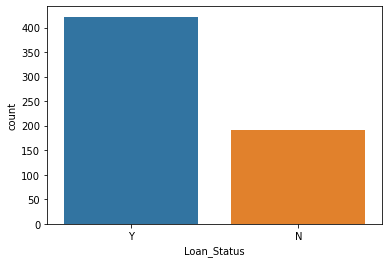

In [9]:
sn.countplot(df['Loan_Status'])

In [10]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
# not considering this as imbalance data as 'No' is almost half of 'yes'

In [12]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
# dropping loan_id columns as doesn't make any significance on prediction

df.drop(['Loan_ID'],axis=1,inplace=True)

In [14]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [16]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [17]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
# gender,married and self employed are categorical data so its null values treated with mode

df['Gender'].fillna('Male',inplace=True)
df['Married'].fillna('Yes',inplace=True)
df['Self_Employed'].fillna('No',inplace=True)


In [19]:
df.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
# in above data categorical null values removed and it is left with null values for ordinal and integer features

In [21]:
# to do this we will plot distplot so can check data distribution, if normal then will replace with mean or with median,also we can check its statastical fetaures

In [22]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

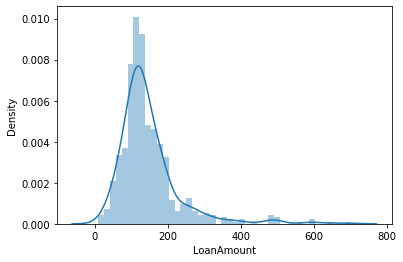

In [24]:
sn.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

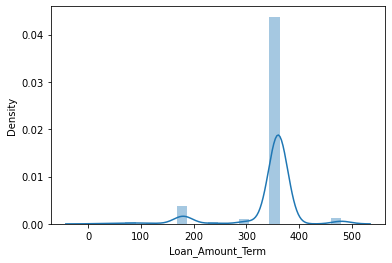

In [25]:
sn.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

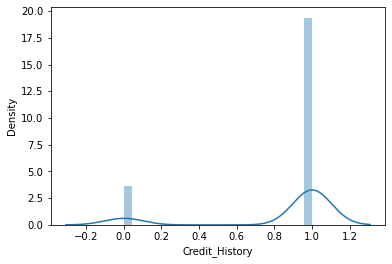

In [26]:
sn.distplot(df['Credit_History'])

In [27]:
# since data are skewed so replacing null values with median


df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(),inplace=True)
df['Dependents']=df['Dependents'].fillna(0)

In [28]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [59]:
# Label encoder to convert categorical features

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

df['Gender']=LE.fit_transform(df['Gender'])
df['Married']=LE.fit_transform(df['Married'])
df['Education']=LE.fit_transform(df['Education'])
df['Self_Employed']=LE.fit_transform(df['Self_Employed'])
df['Property_Area']=LE.fit_transform(df['Property_Area'])
df['Loan_Status']=LE.fit_transform(df['Loan_Status'])


In [65]:
# treating dependent column with get dummies

df1=pd.get_dummies(df,prefix=['Dependents'],columns=['Dependents'])

In [66]:
# Model building and training

x=df1.drop('Loan_Status',axis=1)
y=df1['Loan_Status']

In [67]:
x

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents_0,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,2,0,1,0,0,0
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0,1,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,0,1,0,0,0
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,0,1,0,0,0
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,0,1,0,0,0
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,0,0,0,0,0,1
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,0,0,1,0,0
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,2,0,0,0,1,0


In [68]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [70]:
lm=LogisticRegression()

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [72]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("best accuracy is",maxAccu,"on random_state",maxRs)

best accuracy is 0.7837837837837838 on random_state 181


In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=181)

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [75]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.6910569105691057


In [76]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.8048780487804879


In [77]:
sv=SVC()
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.6829268292682927


In [78]:
# Cross Validation application

from sklearn.model_selection import cross_val_score

In [79]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.7459416233506597


In [80]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.7882713581234173


In [81]:
print(cross_val_score(sv,x,y,cv=5).mean())

0.6872984139677463


In [82]:
# Hyperparameter tuning for random forest

from sklearn.model_selection import GridSearchCV

In [83]:
parameters={'n_estimators':[100],
           'max_features':['auto','sqrt'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

In [84]:
GCV_RF=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV_RF.fit(x_train,y_train)
GCV_RF.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 100}

In [85]:
RF_mod=RandomForestClassifier(criterion='gini',max_depth=5,max_features='auto',n_estimators=100)
RF_mod.fit(x_train,y_train)
pred=RF_mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

82.11382113821138


In [86]:
# svc hyperparameter tuning
parameters={'C':[0.1,1,1.0,10,100,1000],
           'kernel':['poly','rbf','sigmoid']
           }

In [87]:
GCV_SVC=GridSearchCV(SVC(),parameters,cv=5)
GCV_SVC.fit(x_train,y_train)
GCV_SVC.best_params_

{'C': 1000, 'kernel': 'rbf'}

In [88]:
SVC_mod=SVC(C=1000,kernel='rbf')
SVC_mod.fit(x_train,y_train)
pred=SVC_mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

68.29268292682927


In [90]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))


0.7886178861788617


In [91]:
print(cross_val_score(ad,x,y,cv=5).mean())

0.7785285885645742


In [92]:
# adaboost hypertraining

param_grid={'n_estimators':[100,200],
           'learning_rate':[0.001,0.01,0.1,0.2,0.5],
            }

In [93]:
gs_ab=GridSearchCV(AdaBoostClassifier(),param_grid=param_grid)
gs_ab.fit(x_train,y_train)
y_pred=gs_ab.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

82.11382113821138


# Conclusions-found Random forest and adaboost both are at same efficiency, selecting random forest model for prediction

In [94]:
# saving the model

import joblib
joblib.dump(RF_mod,"loanstatusproject.pkl")

['loanstatusproject.pkl']